# Homework 2 - Machine Learning Pipeline

CAPP 30235 Machine Learning for Public Policy

Jonathan Tan

April 18, 2019

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Setup
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

# Import pipeline library, hardcoded config file values
import pipeline_library as library
import pipeline_config as config

## 1. Read Data

`read_data()` is primarily a wrapper for the `pandas.read_data()` function. Right now, it doesn't offer additional functionality, but can be customized in future iterations.

In [3]:
df = library.read_data(config.DATA_PATH)
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


## 2. Explore Data

I wrote four functions to explore my data: `plot_distributions()`, `get_correlations()`, `get_outliers()` and `describe_data()`. 


### 2.1 `plot_distributions()`

`plot_distributions()` plots histograms for every variable in the dataframe supplied to the `df` argument. The user can also optionally give a list of string column names to the `varlist` argument to only plot distributions for certain columns.

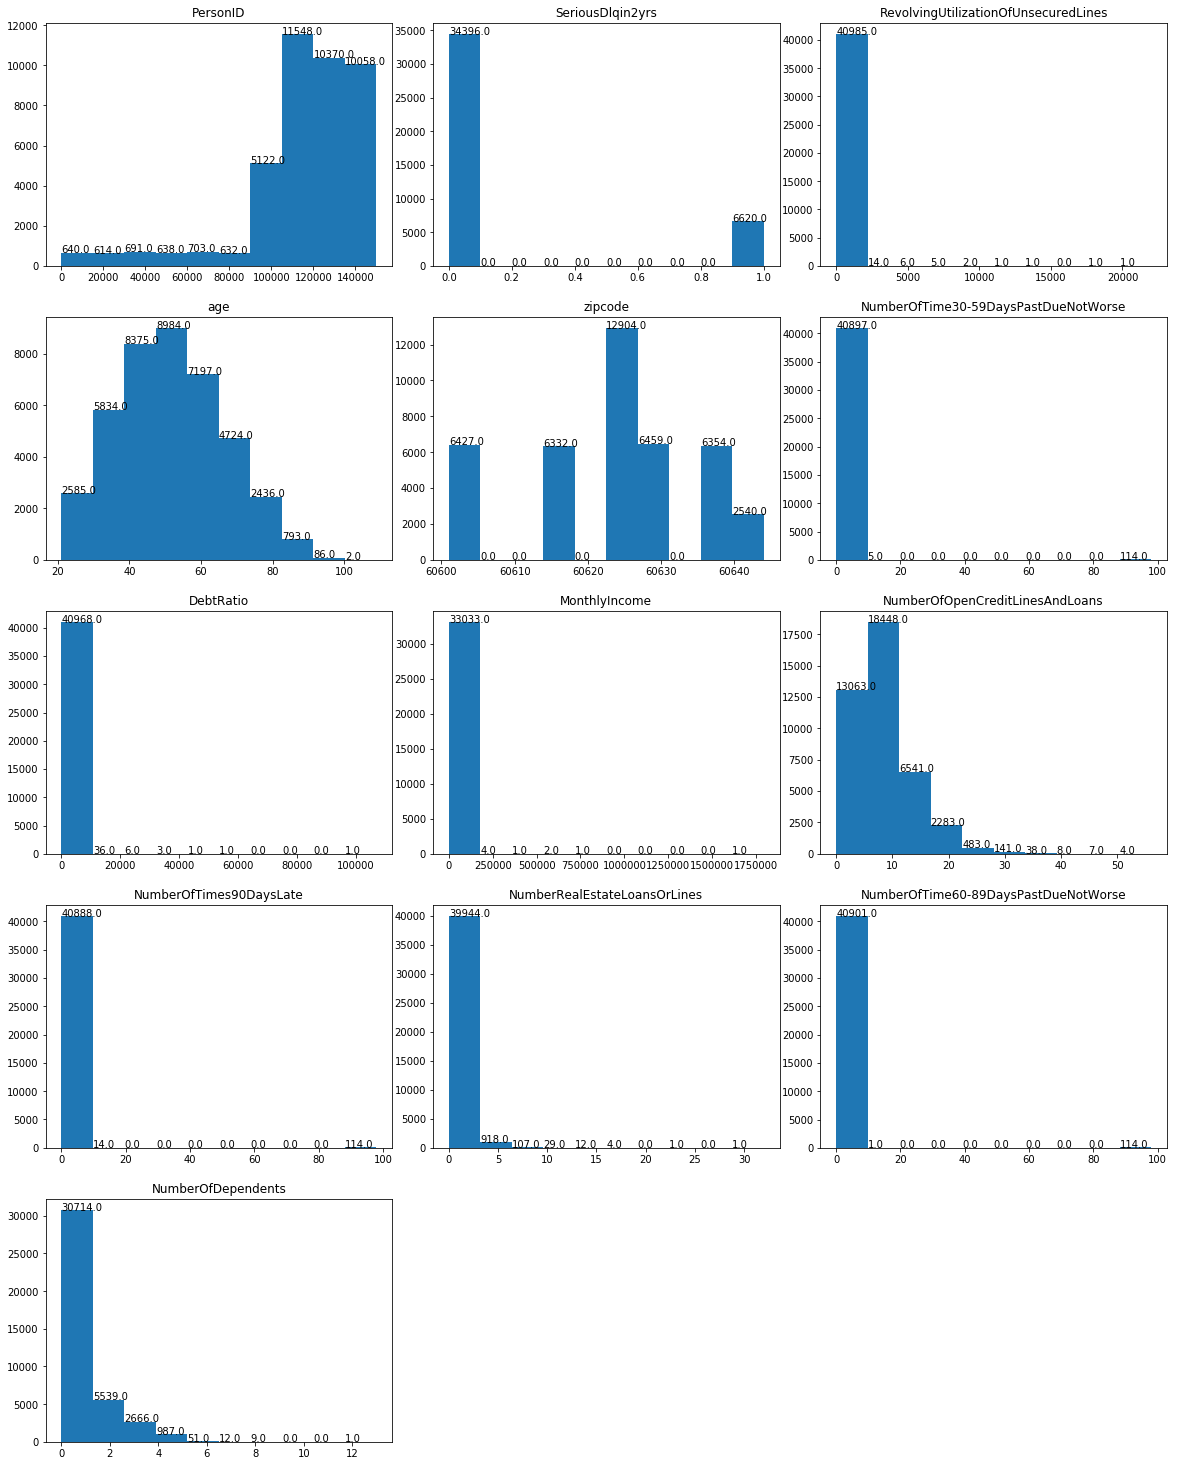

In [4]:
# Plot distributions for all columns.
library.plot_distributions(df)

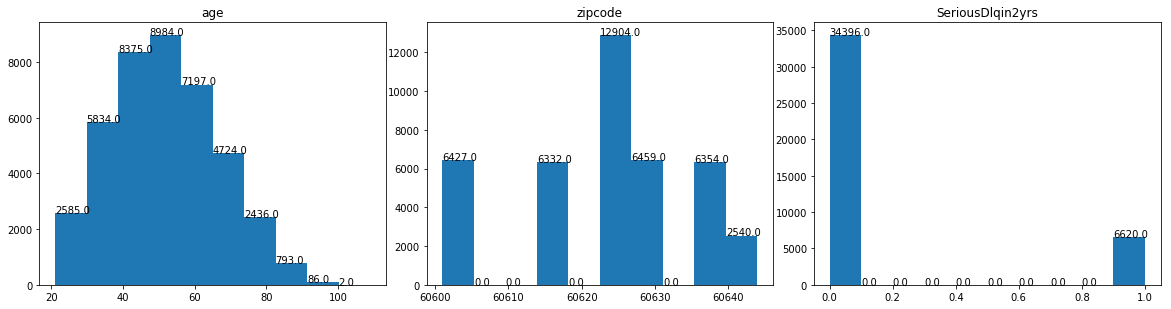

In [5]:
# Plot distributions only for age, zipcode, SeriousDlqin2yrs.
library.plot_distributions(df, varlist=['age', 'zipcode', 'SeriousDlqin2yrs'])

### 2.2 `get_correlations()`

`get_correlations()` takes a pandas dataframe and prints a table of Pearson's correlation coefficients. Optionally, for easy visualization purposes, the user can specify `plot=True` for the function to output a heatmap of the correlation table.

In [6]:
# Print correlation matrix.
library.get_correlations(df)

                                      PersonID  SeriousDlqin2yrs  \
PersonID                              1.000000         -0.622739   
SeriousDlqin2yrs                     -0.622739          1.000000   
RevolvingUtilizationOfUnsecuredLines  0.004499         -0.004586   
age                                   0.108533         -0.173728   
zipcode                              -0.021010         -0.045051   
NumberOfTime30-59DaysPastDueNotWorse -0.082598          0.149334   
DebtRatio                             0.006864         -0.013502   
MonthlyIncome                         0.019755         -0.032810   
NumberOfOpenCreditLinesAndLoans       0.022669         -0.039898   
NumberOfTimes90DaysLate              -0.076856          0.139609   
NumberRealEstateLoansOrLines          0.004341         -0.010641   
NumberOfTime60-89DaysPastDueNotWorse -0.065353          0.121886   
NumberOfDependents                   -0.030364          0.065708   

                                      Revolving

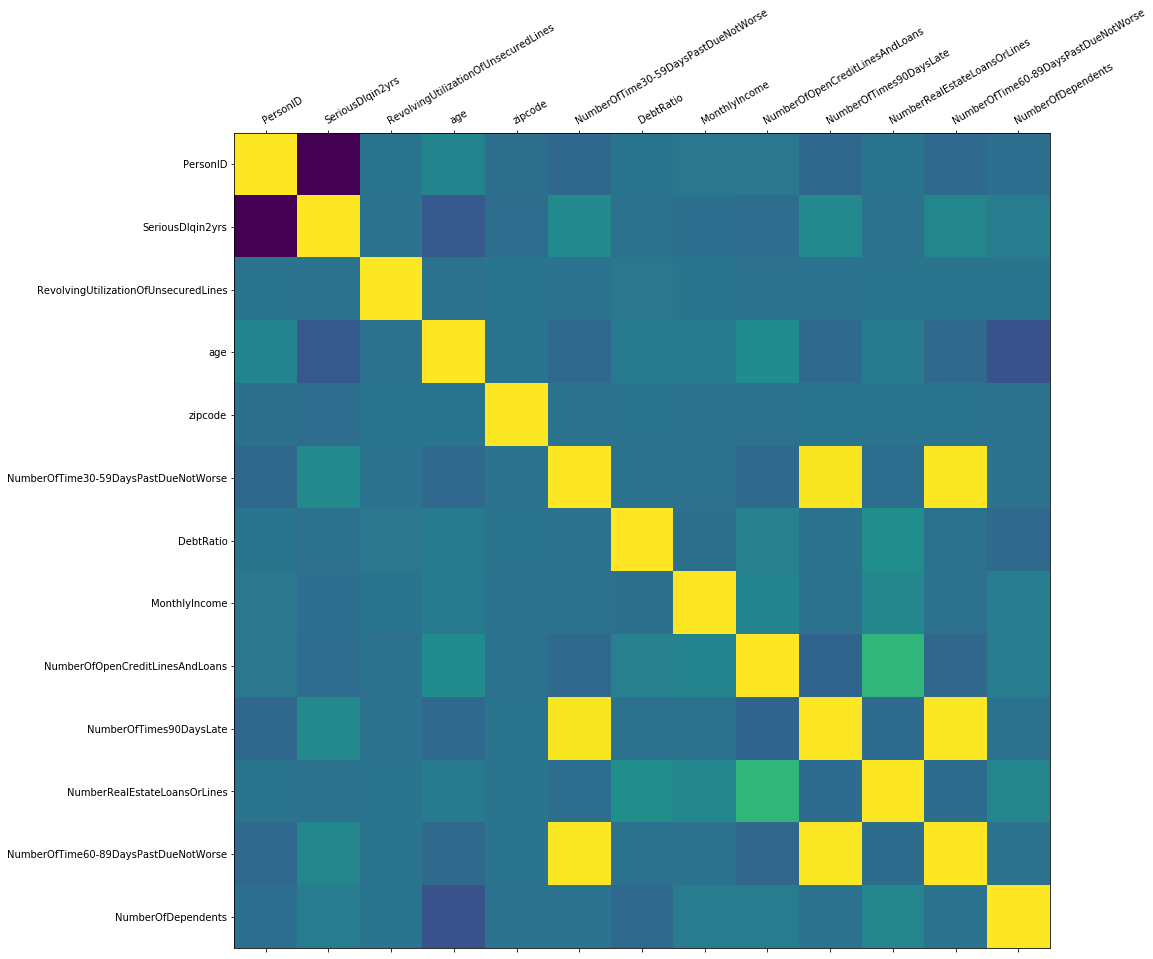

In [7]:
# Plot heatmap of correlation matrix.
library.get_correlations(df, plot=True)

### 2.3 `get_outliers()`

`get_outliers()` takes a pandas dataframe and a specified variable, and returns a new dataframe of the observations with outlier values for the supplied column. We define outliers here in the statisical sense, i.e. having a value greater than 1.5 times the interquartile range above the 3rd quartile or below the 1st quartile.

In [8]:
library.get_outliers(df, 'MonthlyIncome').head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0
5,99033,0,0.142231,57,60601,0,0.015332,13500.0,6,0,0,0,0.0


### 2.4 `describe_data()`

`describe_data()` is, at this point, mostly a wrapper for the `pandas.describe()` method, which provides summary statistics for all numeric variables in the data. It adds the option of specifying a subset of columns to summarize, which is done by giving a list of string column names to the `varlist` argument.

In [9]:
# Describe all columns.
library.describe_data(df)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [10]:
# Describe only SeriousDlqin2yrs, age, MonthlyIncome.
library.describe_data(df, varlist=['SeriousDlqin2yrs', 'age', 'MonthlyIncome'])

,SeriousDlqin2yrs,age,MonthlyIncome
count,41016.000000,41016.000000,3.304200e+04
mean,0.161400,51.683489,6.578996e+03
std,0.367904,14.746880,1.344683e+04
min,0.000000,21.000000,0.000000e+00
25%,0.000000,41.000000,3.333000e+03
50%,0.000000,51.000000,5.250000e+03
75%,0.000000,62.000000,8.055750e+03
max,1.000000,109.000000,1.794060e+06


## 3. Pre-Process Data

### 3.1 `fill_missing()`

`fill_missing()` applies the `pandas.DataFrame.fillna()` method to the specified dataframe. It fills missing values with the mean value of each column by default; this can optionally be switched to filling by the median value by supplying the `median=True` argument.

Future iterations of this function will output lines indicating which variables and how many missing variables were filled.

In [11]:
# Some missing values in MonthlyIncome, NumberOfDependents
print(df.isnull().sum(axis=0))

# Fill in missing values
# Use median to avoid non-integer values for NumberOfDependents
df = library.fill_missing(df, median=True)

# All missing values replaced
print('-----')
print(df.isnull().sum(axis=0))

PersonID                                   0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
zipcode                                    0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1037
dtype: int64
-----
PersonID                                0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
zipcode                                 0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90Day

### 3.2 Drop highly collinear features

`NumberOfTimes90DaysLate` is highly correlated with `NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTime30-59DaysPastDueNotWorse`, with correlation coefficients greater than 0.98. Dropping all but one of the highly collinear features will not impact prediction and improve interpretability, so we'll do that here.

In a practical sense, if we can have a feature that is reportable after 60 days rather than 90 days without a significant tradeoff in accuracy, that seems more useful to train our classifier with, so the feature we'll keep is `NumberOfTime30-59DaysPastDueNotWorse`.

In [12]:
df = df.drop(labels=['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis=1)

## 4. Generate Features/Predictors

### 4.1 `bin_continuous_var()`

`bin_continuous_var()` takes a pandas DataFrame, a string label for a continuous variable, and a specified bin width and/or number of bins as inputs, then creates a new binned variable based on the provided bin specs and returns a new DataFrame with the new variable.

### 4.2 `make_dummy_vars()`

`make_dummy_var()` takes a pandas dataframe and a string label for a column, and returns a new dataframe with binary variables for each unique value in the column.

In [13]:
# Apply them to at least one variable each in this data.

# Discretize age in 10-year bins.
df = library.bin_continuous_var(df, 'age', bin_width=10)

# Make dummy variables for zipcode and discretized age_bin.
df = library.make_dummy_vars(df, 'zipcode')
df = library.make_dummy_vars(df, 'age_bin')

## 5. Build Classifier

These are the general steps I followed:
1. Split full data into feature and label sets.
2. Split feature and label sets each into training and test sets.
3. Fit Decision Tree classifier using features and labels from training set.

In [14]:
# Code below adapted from 2018 CAPP 30235 Lab 3
# https://github.com/dssg/MLforPublicPolicy/blob/master/labs/2018/lab3_knn_dt.ipynb

# 1. Split full data into feature and label sets.
features_df = df.drop(labels=['PersonID', 'SeriousDlqin2yrs'], axis=1)
labels_df = df[['SeriousDlqin2yrs']]

# 2. Split feature and label sets each into training and test sets.
features_train, features_test, labels_train, labels_test = \
    train_test_split(features_df, labels_df,test_size=config.TEST_SIZE)

In [15]:
# 3. Fit Decision Tree classifier using features and labels from training set.
# Only parameter given is to use entropy; no depth/leaf size constraints
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(features_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 6. Evaluate Classifier

Continuing from above:
4. Predict labels by applying classifier to features from test set.
5. Evaluate accuracy by comparing predicted labels to actual labels from test set.
6. Visualize tree.

In [16]:
# 4. Predict labels by applying classifier to features from test set.
calc_threshold = lambda x,y: 0 if x < y else 1 
labels_prob = classifier.predict_proba(features_test)[:, 1]
labels_pred = pd.Series([calc_threshold(x, config.CLASS_THRESHOLD) for x in labels_prob])

# 5. Evaluate accuracy by comparing predicted labels to actual labels from test set.
accuracy_score(y_true=labels_test, y_pred=labels_pred)

0.7922795611540024

Without any particular model parameters specified (other than selecting entropy as the metric of choice), the Decision Tree classifier correctly predicted 80% of the labels in the test data.

This is unlikely to be optimal. Next, we'll iterate over several values for maximum tree depth and see if we can find a depth that optimizes accuracy.

In [17]:
# Repeat 3, 4, 5 with various levels of tree depth, up til all features are used 
# then find optimal max depth based on test accuracy score.

for i in range(1, 10):
    
    # Train
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    classifier.fit(features_train, labels_train)
    
    # Predict probability
    training_prob = classifier.predict_proba(features_train)[:, 1]
    test_prob = classifier.predict_proba(features_test)[:, 1]
    
    # Get label based on probability
    training_pred = pd.Series([calc_threshold(x, config.CLASS_THRESHOLD) for x in training_prob])
    test_pred = pd.Series([calc_threshold(x, config.CLASS_THRESHOLD) for x in test_prob])
    
    # Evaluate accuracy
    training_score = accuracy_score(y_true=labels_train, y_pred=training_pred)
    test_score = accuracy_score(y_true=labels_test, y_pred=test_pred)
    
    print(f"Depth: {i}, prob threhold: {config.CLASS_THRESHOLD}, Train acc: {training_score}, Test acc: {test_score}")

Depth: 1, prob threhold: 0.5, Train acc: 0.8378670196092091, Test acc: 0.8403088175538399
Depth: 2, prob threhold: 0.5, Train acc: 0.850510257392637, Test acc: 0.8498171475010159
Depth: 3, prob threhold: 0.5, Train acc: 0.8543067117132807, Test acc: 0.8523364485981308
Depth: 4, prob threhold: 0.5, Train acc: 0.8566751419316638, Test acc: 0.854368143031288
Depth: 5, prob threhold: 0.5, Train acc: 0.8611333635192087, Test acc: 0.8589191385615603
Depth: 6, prob threhold: 0.5, Train acc: 0.8613423426561249, Test acc: 0.8587566030069078
Depth: 7, prob threhold: 0.5, Train acc: 0.8641635610044931, Test acc: 0.8604632263307599
Depth: 8, prob threhold: 0.5, Train acc: 0.8658353940998224, Test acc: 0.8595692807801707
Depth: 9, prob threhold: 0.5, Train acc: 0.8683431437428163, Test acc: 0.857700121901666


From training several iterations of the Decision Tree classifier with varying max depths, the classifier trained with a max depth of 5 did the best in terms of classification accuracy (86%).

Below, we'll visualize what that tree looks like.

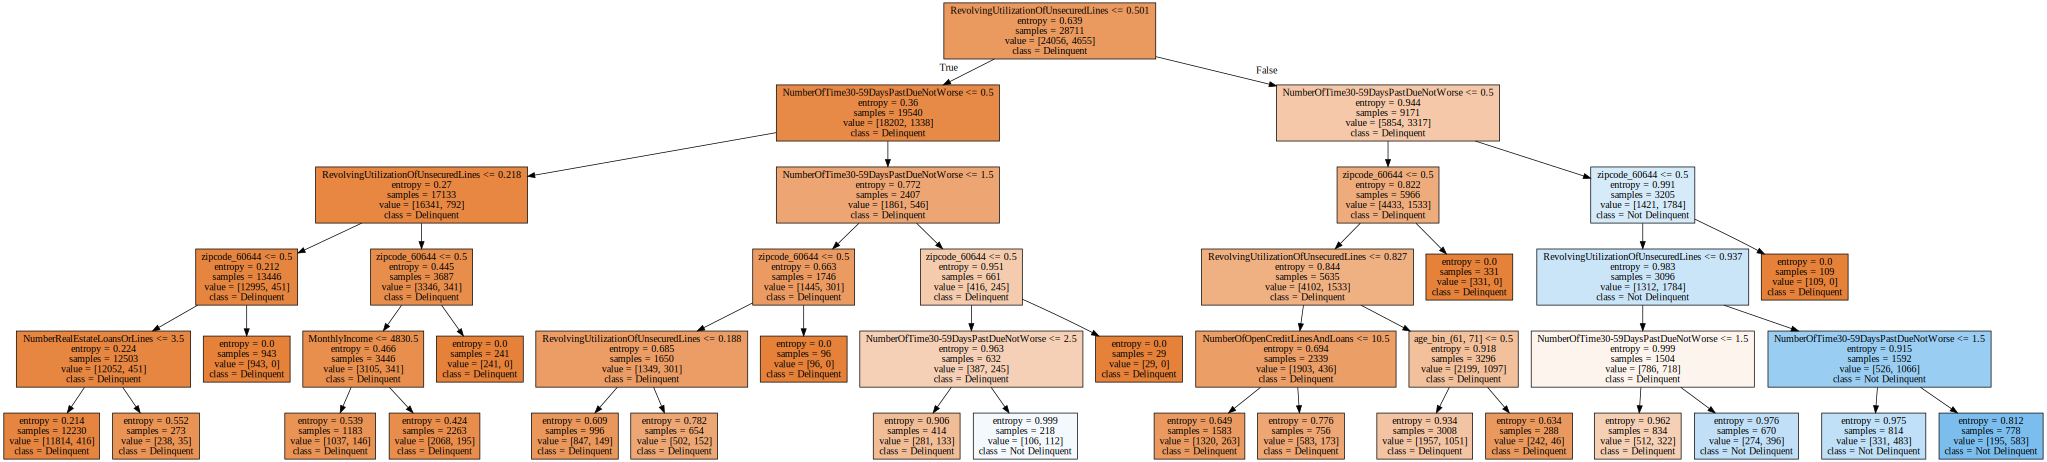

In [18]:
# 6. Visualize best tree.

# Train best tree from above.
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)
classifier.fit(features_train, labels_train)

# Export tree in .dot format.
export_graphviz(classifier,
                out_file=config.OUT_FILE_DOT,
                feature_names=features_train.columns.tolist(),
                class_names=config.CLASS_NAMES,
                filled=True)

# Save human-readable tree in .png format.
graphviz.render('dot', 'png', config.OUT_FILE_DOT)

# Display tree.
graphviz.Source.from_file(config.OUT_FILE_DOT)